# <center>XOR Test Perceptron</center>

## Data Generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
center1 = [[0,0],[1,1]]
center2 = [[0,1],[1,0]]

radius = 0.45
num_samples = 100
theta = np.linspace(0, 2*np.pi, num_samples)
a, b = 1 * np.cos(theta), 1 * np.sin(theta)

r = radius*np.random.random((num_samples))
x11, y11 = center1[0][0]+r * np.cos(theta), center1[0][1]+r * np.sin(theta)
r = radius*np.random.random((num_samples))
x12, y12 = center1[1][0]+r * np.cos(theta), center1[1][1]+r * np.sin(theta)
r = radius*np.random.random((num_samples))
x21, y21 = center2[0][0]+r * np.cos(theta), center2[0][1]+r * np.sin(theta)
r = radius*np.random.random((num_samples))
x22, y22 = center2[1][0]+r * np.cos(theta), center2[1][1]+r * np.sin(theta)
x1 = np.append(x11,x12)
y1 = np.append(y11,y12)
x2 = np.append(x21,x22)
y2 = np.append(y21,y22)

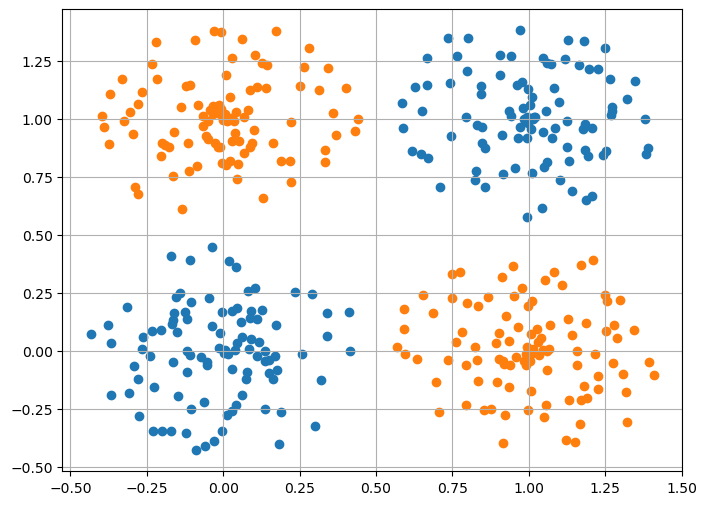

In [3]:
plt.figure(figsize=(8,6))

plt.scatter(x1, y1)
plt.scatter(x2,y2)
plt.grid()
plt.savefig("XOR.png")
plt.show()

In [4]:
## Format the Data Matrix
x1 = np.matrix(x1).T
y1 = np.matrix(y1).T
x2 = np.matrix(x2).T
y2 = np.matrix(y2).T


data0 = np.hstack((x1,y1))
data1 = np.hstack((x2,y2))
data = np.append(data0,data1,axis=0)
data.shape

(400, 2)

In [5]:
## Add Labels to each point
labels = np.matrix(np.append(np.zeros((200)),np.ones((200)))).T
labels.shape

(400, 1)

In [6]:
data_withLabels = np.hstack((data,labels))
data_withLabels.shape

(400, 3)

In [7]:
np.savetxt("XOR_dataset.csv",data_withLabels,delimiter=',')

## Using XOR-dataset

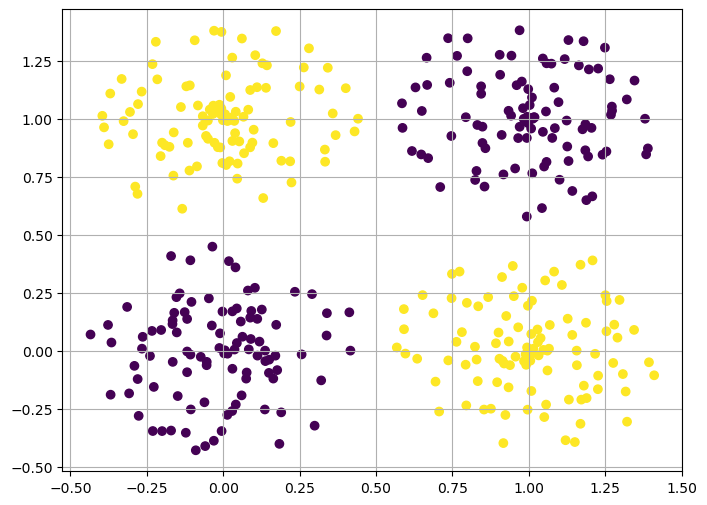

In [8]:
data = np.genfromtxt("XOR_dataset.csv",delimiter=',')

plt.figure(figsize=(8,6))
plt.grid()
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.show()

## Perceptron fails to give high accuracy on XOR dataset!

In [9]:
from sklearn.linear_model import Perceptron
X = data[:,:-1] ; y = data[:,-1]
clf = Perceptron()
clf.fit(X,y)

Perceptron()

In [10]:
w = clf.coef_
b = clf.intercept_

In [11]:
w.shape

(1, 2)

In [12]:
print("Weights:",w)
print("Bias:",b)

Weights: [[-1.97202571  0.71623214]]
Bias: [-1.]


In [13]:
xx = np.linspace(-0.5,1.5,100)
yy = -(1/w[0][1])*(w[0][0]*xx + b)

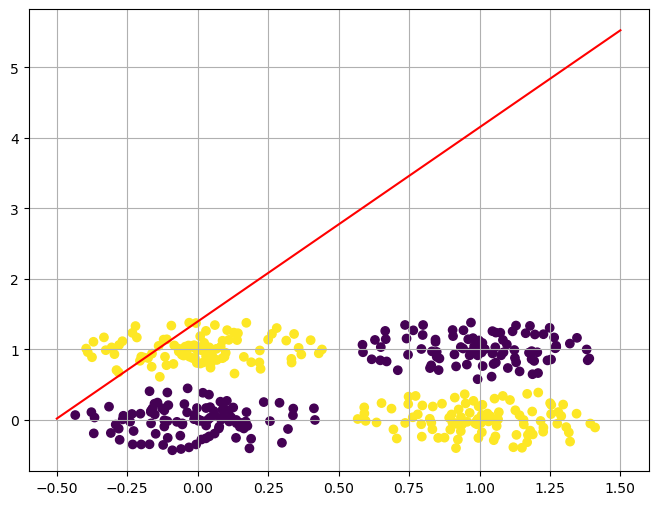

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.plot(xx,yy,c='red')
plt.grid()
plt.show()

In [15]:
clf.score(X,y)

0.5575

## Test Accuracy

In [16]:
from sklearn.metrics import accuracy_score
pred=clf.predict(X)
pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
print("Accuracy: ",accuracy_score(y, pred))

Accuracy:  0.5575
